# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from seaborn import load_dataset

In [14]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

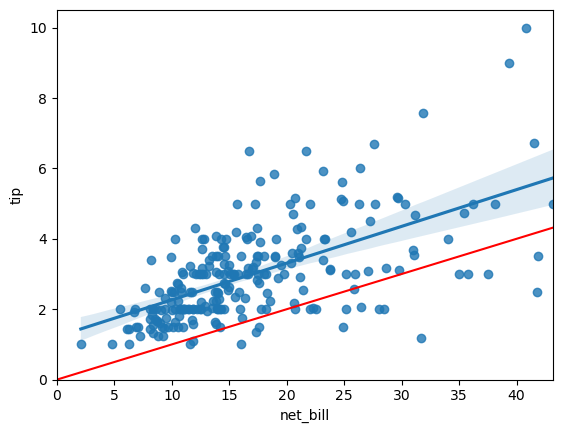

In [15]:
sns.regplot(y='tip',x='net_bill', data=tips[tips['tip_pct']<.5])
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x
plt.plot(x, y, '-r', label='linha dos 10%')
plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [4]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 01 May 2023   Prob (F-statistic):           5.02e-23
Time:                        18:48:43   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

(0.0, 5.335050000000001)

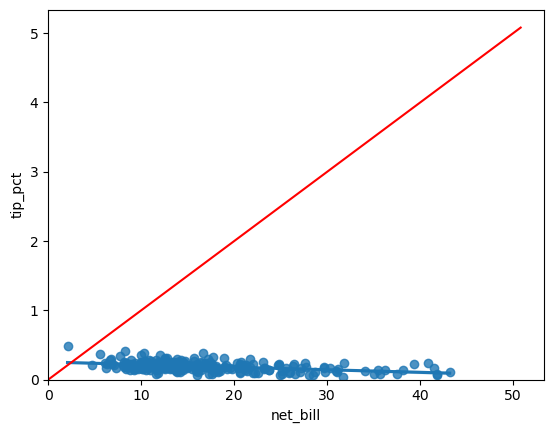

In [5]:
sns.regplot(y='tip_pct',x='net_bill', data=tips[tips['tip_pct']<.5])
x = np.linspace(0,tips['total_bill'].max(),100)
y = .1*x
plt.plot(x, y, '-r', label='linha dos 10%')
plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [6]:
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.52e-06
Time:                        18:51:33   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

O primeiro modelo tem um ajuste melhor do que o segundo, com um R-quadrado de 0,333 em comparação com 0,091 do segundo modelo, o que indica que o primeiro modelo explica mais variação nos dados.

No primeiro modelo, a variável "net_bill" tem coeficiente positivo, indicando que quanto maior valor da conta, maior a gorjeta. Já no segundo modelo, a variável "net_bill" tem coeficiente negativo, indicando que quanto maior o valor da conta, menor a gorjeta.

A comparação direta dos R-quadrados pode ser enganosa, especialmente por se tratar de modelos com diferentes variáveis independentes, sendo recomendado considerar outras métricas e aspectos antes de tirar conclusões finais.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [12]:
pred = reg.fittedvalues
tip_pred = pred * tips['net_bill']
SSR = ((tips['tip'] - tip_pred) ** 2).sum()
SST = ((tips['tip'] - tips['tip'].mean()) ** 2).sum()
R2_tip = 1 - SSR / SST
print("R-quadrado para tip_pct:", reg.rsquared)
print("R-quadrado para tip:", R2_tip)

R-quadrado para tip_pct: 0.09129084920662944
R-quadrado para tip: 0.10889974845461314


No primeiro modelo, em que a variável dependente é "tip" e a variável independente é "net_bill", o R-quadrado é 0.333, ou seja, cerca de 33.3% da variabilidade da gorjeta ("tip") pode ser explicada pela variabilidade do valor líquido da conta ("net_bill").

No último modelo gerado, em que a variável dependente é "tip_pct" e a variável independente é "net_bill", o R-quadrado é 0.108, ou seja, cerca de 10.8% da variação na porcentagem da gorjeta ("tip_pct") pode ser explicada pela variação do valor líquido da conta ("net_bill"). 

Isso indica que o valor líquido da conta (net_bill) é um preditor mais forte do valor absoluto da gorjeta (tip) do que  da porcentagem da gorjeta (tip_pct).